## <b> NB01 - City Selection </b>

Selection criteria
| What | Why and How |
| :--: | :--: |
| In the Northern Hemisphere | to somewhat standardize climate in my chosen time period (i.e., the seasons would relatively be the same in my chosen cities) |
| Have a reputation for being rainy | this will be decided upon intuitively/through general searches on infamous rainy movie scenes (e.g., "It rains nine months a year in Seattle", Sleepless in Seattle) |
| 5 cities in total | to have a big enough sample size to be able to comprehensively compare between cities, yet not have the number of cities be overwhelming |

Based on my criteria, these are the cities I have chosen:
1) London, UK
2) Oslo, Norway
3) Seattle, USA
4) Munich, Germany
5) Kyoto, Japan

The movies that prominently feature rain in these cities respectively are:
1) Notting Hill/Bridget Jones' Diary/Four Weddings and a Funeral 
2) Oslo, August 31st (<u> NOTE: </u> Mostly no rain in the movie but it rains a lot in Oslo/Norway, which is why it's on the list!)
3) Sleepless in Seattle
4) Suspiria
5) Rashomon

In [98]:
## I'm importing the packages that I'll be using throughout this assignment
import pandas as pd
import os
import json
import requests
import numpy as np

from lets_plot import *
LetsPlot.setup_html()

#!pip install geopandas

import geopandas as gpd
from lets_plot.geo_data import *

from lets_plot import *
LetsPlot.setup_html()

from functions import *

#!pip install geodatasets
import geodatasets

from IPython.display import Image

I have created a function to print out the output from "get_lat_lon", so I have imported that and will be using it to efficiently get the latitude and longitudes for all five of my cities!

In [ ]:
print_location_lat_lon('GB', 'London')

In [ ]:
print_location_lat_lon('NO', 'Oslo')

In [ ]:
print_location_lat_lon('US', 'Seattle')

In [ ]:
print_location_lat_lon('DE', 'Munich')

In [ ]:
print_location_lat_lon('JP', 'Kyoto')

In [ ]:
cities = [
    ("GB", "London"),
    ("JP", "Kyoto"),
    ("DE", "Munich"),
    ("US", "Seattle"),
    ("NO", "Oslo")
]

start_date = '2021-01-01'
end_date = '2024-01-01'

all_city_data = []

for country_code, city_name in cities:
    json_data = get_historical_data(country_code, city_name, start_date, end_date)
    
    city_data = {
        "country": country_code,
        "city": city_name,
        "date": json_data['daily']['time'],
        "rain_sum": json_data['daily']['rain_sum']
    }
    
    city_df = pd.DataFrame(city_data)
    all_city_data.append(city_df)


final_df = pd.concat(all_city_data, ignore_index=True)

final_df.to_csv('../data/historical_city_rain_data.csv', index=False)

## Map graph

In [91]:
import pandas as pd
from lets_plot import *

data = pd.read_csv('/files/ds105a-2024-w06-summative-deyavuz/data/mean_raininess_per_city.csv')

centroids = geocode_cities(data["city"]).get_centroids()

p = ggplot() + ggsize(800, 500)

lats = [0 * y for y in range(4)]

plot = (
    p + 
    geom_livemap(zoom=2) +  
    geom_hline(aes(yintercept=lats), color='red', linetype=2, size=1) +  
    geom_point(aes(color='city'), 
               data=centroids,  
               size=5,  
               show_legend=True,  
               tooltips=layer_tooltips().title("@city"))  
)

plot

In [96]:
import pandas as pd
from lets_plot import *

# Load the data
data = pd.read_csv('/files/ds105a-2024-w06-summative-deyavuz/data/mean_raininess_per_city.csv')

# Get centroids for the cities
centroids = geocode_cities(data["city"]).get_centroids()

# Convert centroids to a DataFrame if it is not already
if hasattr(centroids, 'to_dataframe'):
    centroids = centroids.to_dataframe()  # Convert to DataFrame if it is a GeoDataFrame
else:
    centroids = pd.DataFrame(centroids)  # Ensure it's a DataFrame

# Check the centroids structure
print(centroids.head())  # Verify that it contains 'lon' and 'lat'

# Create the base plot with a defined size
p = ggplot() + ggsize(800, 500)  # Set width and height

# Define the latitude lines (example, adjust if needed)
lats = [0 * y for y in range(4)]

# Build the plot
plot = (
    p + 
    geom_livemap(zoom=2) +  
    geom_hline(aes(yintercept=lats), color='red', linetype=2, size=1) +  
    geom_point(aes(x='lon', y='lat', color='city'),  # Ensure you're using the right column names
               data=centroids,  
               size=5,  
               show_legend=True,  
               tooltips=layer_tooltips().title("@city"))  
)

# Save the plot to a PNG file with specified width and height
ggsave(plot, filename='static_cities_map.png', path='/files/ds105a-2024-w06-summative-deyavuz/figures', w=8, h=5, unit='in', dpi=300)


      city found name                     geometry
0    Kyoto      Kyoto   POINT (135.75561 35.02104)
1   London     London    POINT (-0.14406 51.48933)
2   Munich     Munich   POINT (-98.83213 48.66989)
3     Oslo       Oslo     POINT (10.77573 59.9724)
4  Seattle    Seattle  POINT (-122.31306 47.61897)


'/files/ds105a-2024-w06-summative-deyavuz/figures/static_cities_map.png'

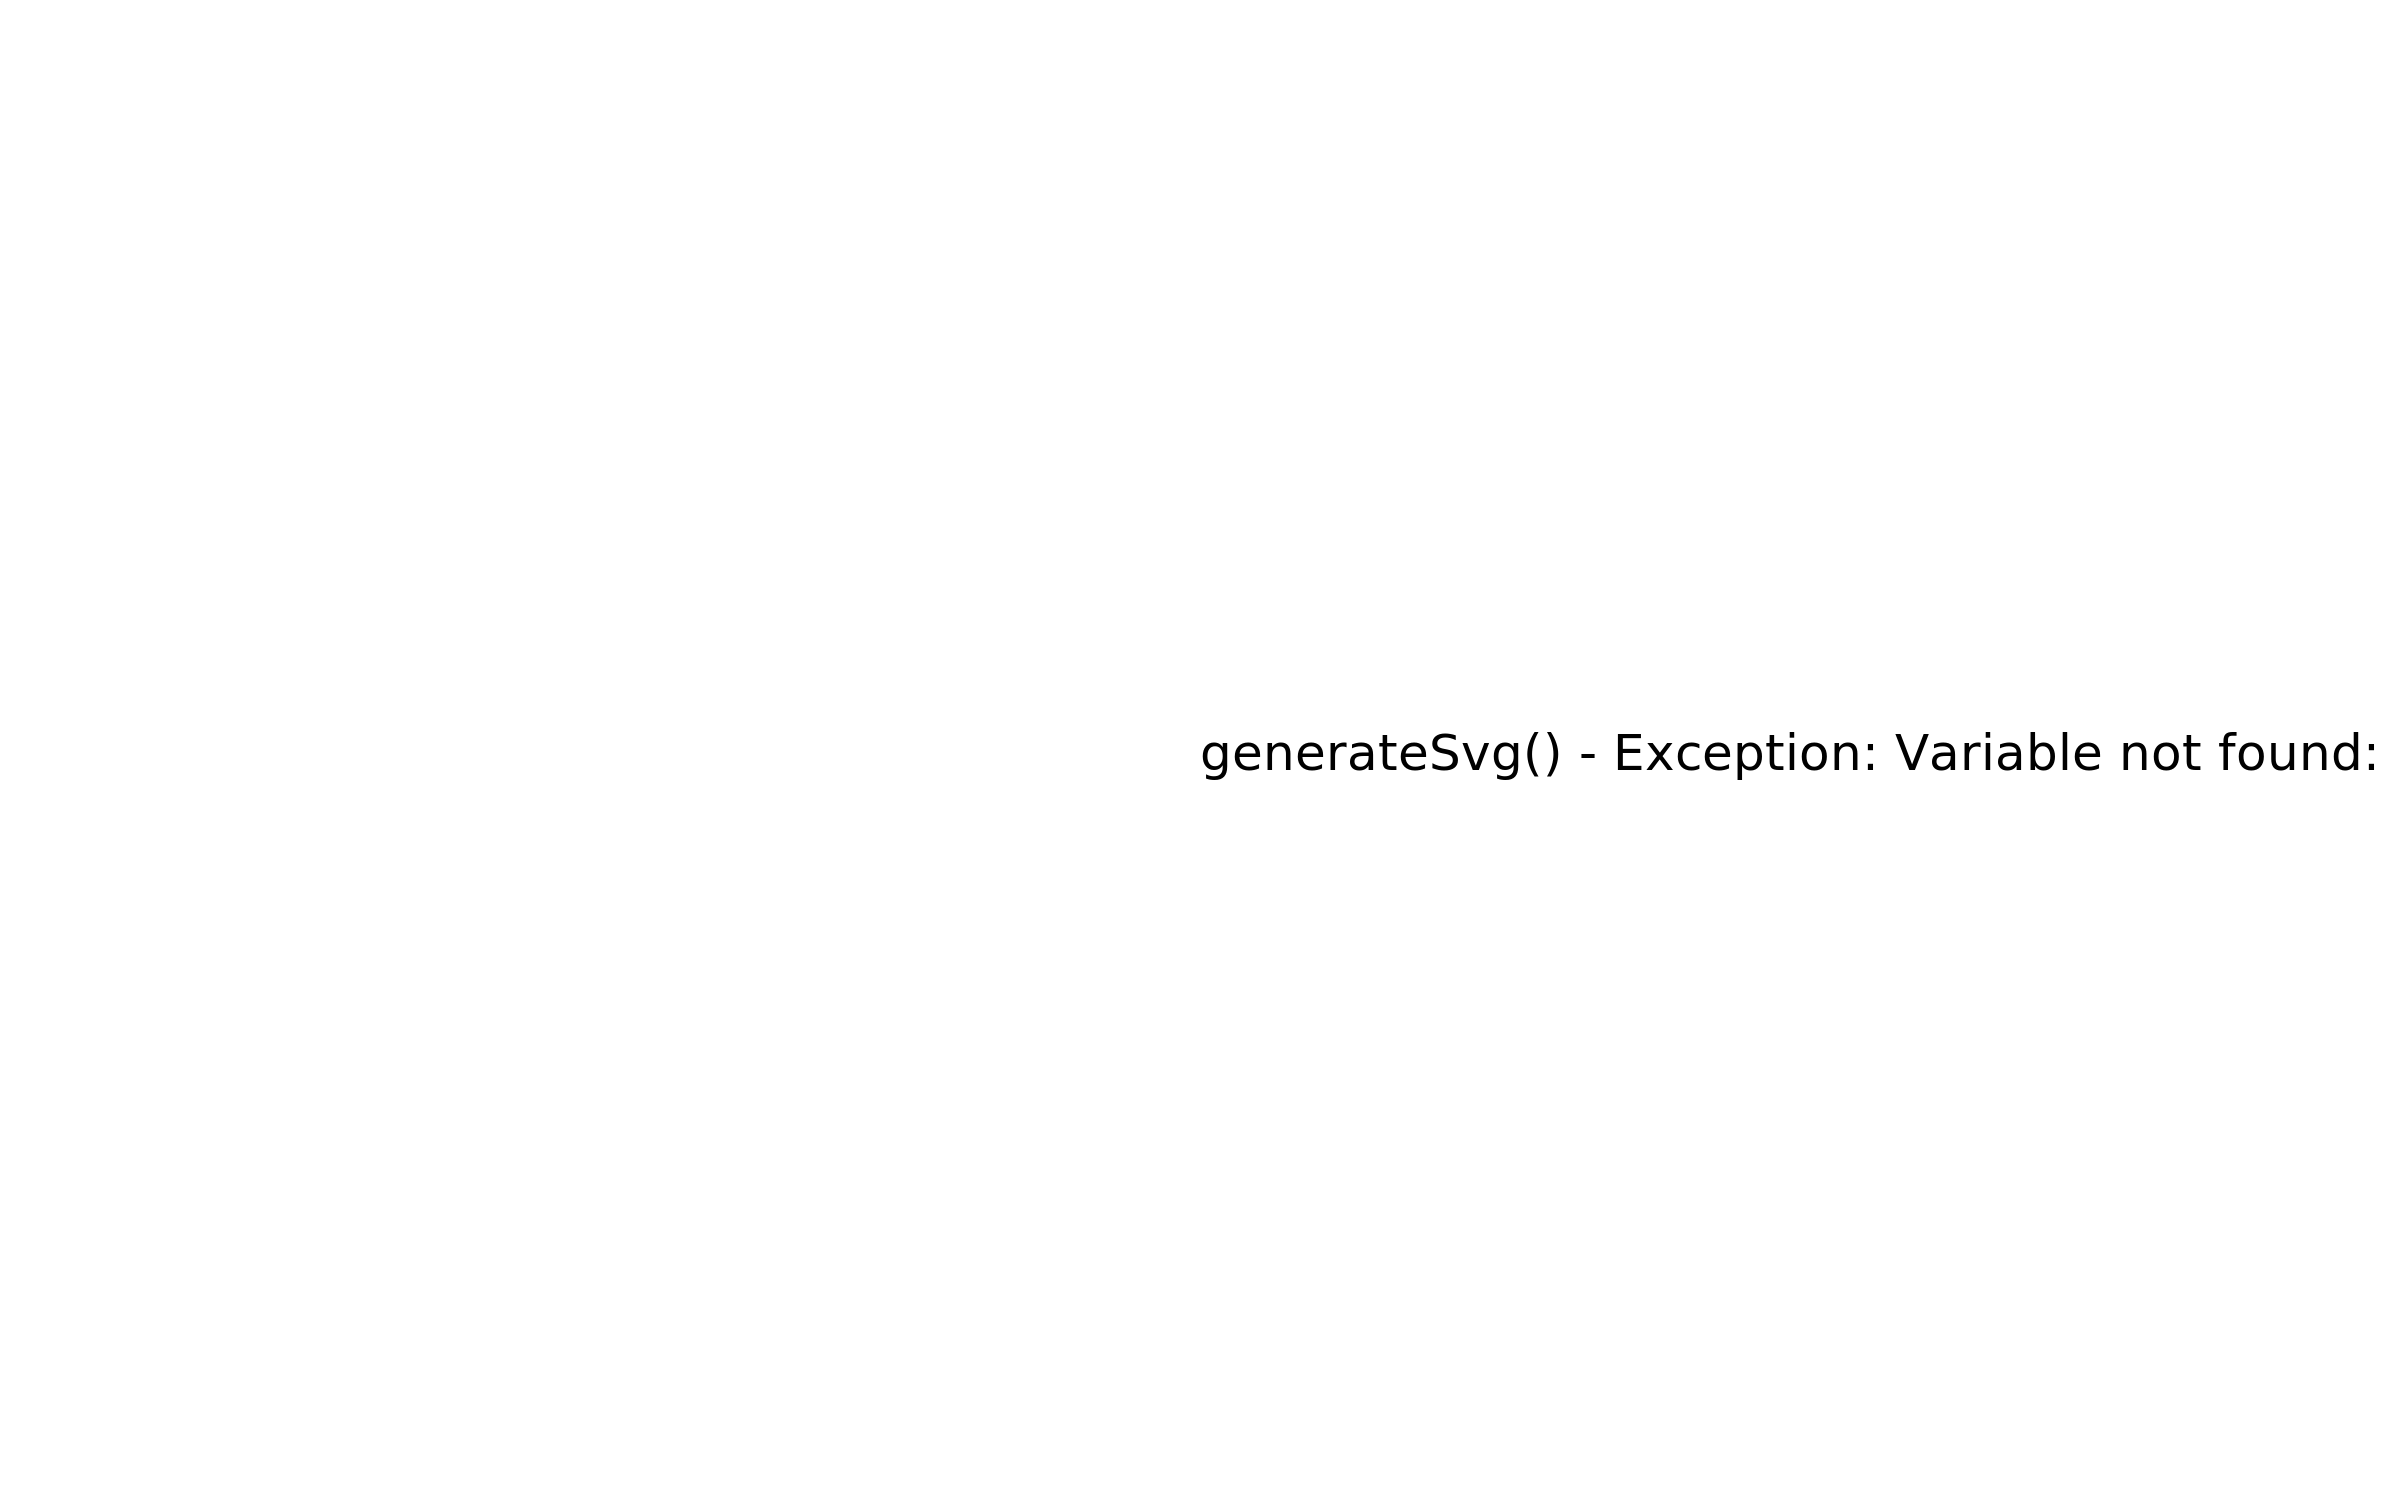

In [99]:
Image(filename='/files/ds105a-2024-w06-summative-deyavuz/figures/static_cities_map.png') 

In [86]:
data = pd.read_csv('/files/ds105a-2024-w06-summative-deyavuz/data/mean_raininess_per_city.csv')

centroids = geocode_cities(data["city"]).get_centroids()

p = ggplot() + ggsize(800, 500)

plot = (
    p + 
    geom_livemap(zoom=2.75) +
    geom_hline(aes(yintercept=lats), color='#e0218a', linetype=2, size=1) +
    geom_point(aes(size='mean_raininess', color='city'), 
               show_legend=True,  
               data=data,
               map=centroids, 
               map_join="city", 
               tooltips=layer_tooltips().title("@city"))
)

plot
